In [3]:
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
from preprocess_data import EigenfacesDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

In [5]:
INPUT_SIZE = 120 * 128
NUM_EPOCHS = 10
BATCH_SIZE = 10
LEARNING_RATE = 1e-3

In [6]:
normalize_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])
eigenfaces_dataset = EigenfacesDataset(
    data_dir='../data',
    label='head_position',
    transform=normalize_transform)
trainset, testset = random_split(
    eigenfaces_dataset, [BATCH_SIZE * 10, len(eigenfaces_dataset) - BATCH_SIZE * 10])

In [7]:
train_loader = DataLoader(trainset)
test_loader = DataLoader(testset)

In [13]:
eigenfaces_dataloader = DataLoader(eigenfaces_dataset)

In [27]:
eigenfaces_dataloader.dataset[0][0].shape

torch.Size([120, 128])

In [37]:
len(eigenfaces_dataloader)

624

In [39]:
type(eigenfaces_dataloader)

torch.utils.data.dataloader.DataLoader

In [34]:
for images, labels in eigenfaces_dataloader:
    print(images.shape)

torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([1, 120, 128])
torch.Size([

In [40]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [44]:
num_pixels = 120 * 128
data = np.empty((0, num_pixels))

# Iterate over the batches
for batch in eigenfaces_dataloader:
    # Flatten the batch
    batch = batch.view(batch.size(0), -1)
    # Convert the batch to a NumPy array
    batch = batch.numpy()
    # Center the batch around the mean
    batch = center_data(batch)
    # Concatenate the batch with the rest of the data
    data = np.concatenate((data, batch), axis=0)

AttributeError: 'list' object has no attribute 'view'

In [53]:
eigenfaces_dataloader.dataset[0][0].shape

torch.Size([120, 128])

In [ ]:
flattened_tensors_list = []

# Flatten the tensors and add them to the list
for tensor_list in eigenfaces_dataloader:
    flattened_tensors = tensor_list[0].view(tensor_list[0].size(0), -1)
    flattened_tensors_list.append(flattened_tensors)

# Concatenate the flattened tensors into one dataset
dataset = torch.cat(flattened_tensors_list, dim=0)

# dataset now contains all the flattened tensors concatenated into one dataset


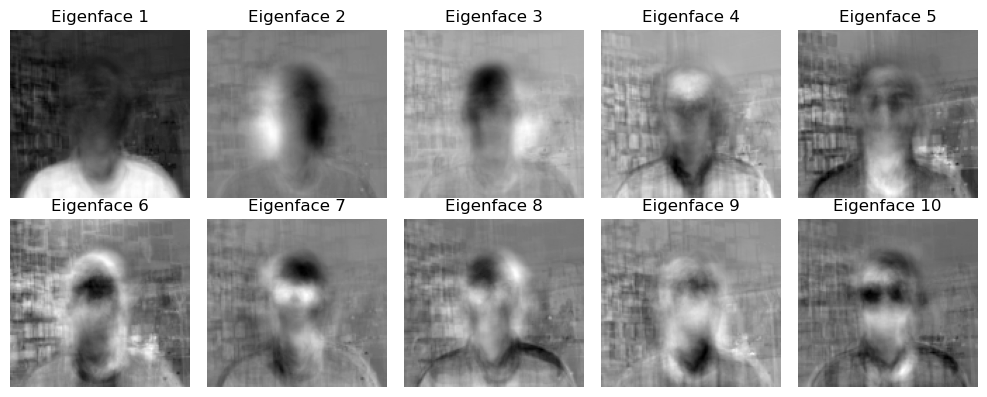

In [71]:
# Flatten the data
flat_tensors = []
for tensor_list in eigenfaces_dataloader:
    flattened_tensors = torch.flatten(tensor_list[0].squeeze())
    flat_tensors.append(flattened_tensors)
    # print(torch.flatten(tensor_list[0].squeeze()).shape)
    
flat_data = torch.stack([t.view(-1) for t in flat_tensors])

# Convert the tensor to a numpy array
data = flat_data.numpy()

# Create a PCA object with the desired number of components
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(data)

# Get the principal components
components = pca.components_

eigenfaces = components.reshape(-1, 1, 120, 128)

# Plot the eigenfaces
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Eigenface {i+1}")
plt.tight_layout()
plt.show()


/Users/jacobchang/miniforge3/envs/default_dev/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


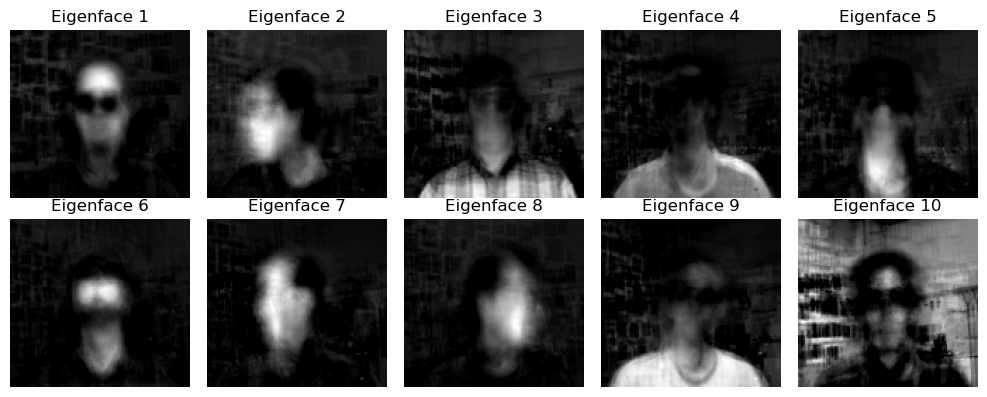

In [73]:
import numpy as np
import torch
from sklearn.decomposition import NMF

# Assume `tensors` is a list of PyTorch tensors

# Flatten each tensor and stack them into a single tensor
flat_tensors = []
for tensor_list in eigenfaces_dataloader:
    flattened_tensors = torch.flatten(tensor_list[0].squeeze())
    flat_tensors.append(flattened_tensors)
    # print(torch.flatten(tensor_list[0].squeeze()).shape)
flat_data = torch.stack([t.view(-1) for t in flat_tensors])

# Convert the tensor to a numpy array
data = flat_data.numpy()

# Create an NMF object with the desired number of components
n_components = 10
nmf = NMF(n_components=n_components)

# Shift the data to be non-negative
data_min = np.min(data)
if data_min < 0:
    data -= data_min

# Fit the NMF model to the data
W = nmf.fit_transform(data)
H = nmf.components_

# Get the basis vectors (i.e., the "eigenfaces")
eigenfaces = H.reshape(-1, 1, 120, 128)

# Plot the eigenfaces
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Eigenface {i+1}")
plt.tight_layout()
plt.show()
